# k분할교차검증

k분할교차검증은 학습 능력을 평가하는 것이다. 여기서는 학습데이터만 가지고 평가하고 가장 값이 높게 나온 모델을 가지고 평가한다.

> k 분할에 대한 모든 성능을 추정하고 평균과 포준편차를 계산한다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

In [3]:
# Target 확인
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [4]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [5]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

## 성능 예측하기

- cross_val_score(model, x_train, y_train, cv=n) 형태
- cv에 k값을 지정한다.

## 1.Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(random_state=2022)

# 학습,예측하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인하기
print('평균:', cv_score.mean())
print('표준편차:',cv_score.std())

평균: 0.9518181818181819
표준편차: 0.06581341017359368


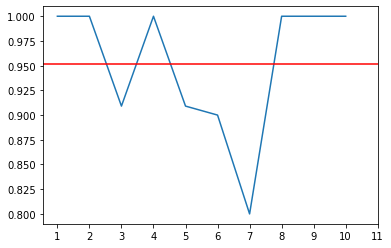

In [12]:
# 성능 정보 시각화

plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0,11), range(1,12))
plt.show()

## 2.KNN

In [13]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#선언하기
model = KNeighborsClassifier()

#학습, 예측, 평가
cv_score = cross_val_score(model, x_train, y_train, cv=10)

print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

평균: 0.9609090909090909
표준편차: 0.09109526391332329


In [16]:
# 루프 돌려서 최적화 cv 값 찾기

score =[]
my_cv = []
my_neighbors =[]
for c in range(2,21) :
    for n in range(1,11) :
        model = KNeighborsClassifier(n_neighbors=n)
        cv_score = cross_val_score(model, x_train, y_train, cv=c)
        score.append(cv_score.mean())
        my_cv.append(c)
        my_neighbors.append(n)

#print(my_cv)
#print(my_neighbors)
#print(score)

result = pd.DataFrame()
result['cv'] = my_cv
result['neighbors'] = my_neighbors
result['score'] = score
result.sort_values(by='score', ascending=False, inplace=True)

result

,cv,neighbors,score
2,2,3,0.971335
169,18,10,0.962963
168,18,9,0.962963
167,18,8,0.962963
165,18,6,0.962963
...,...,...,...
11,3,2,0.923810
31,5,2,0.923810
8,2,9,0.923440
7,2,8,0.923440


## 3.Logistic Regression

In [17]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# 선언하기 
model = LogisticRegression(max_iter=500)


# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균:',cv_score.mean())
print('표준편차:', cv_score.std())

[1.         1.         0.90909091 1.         0.81818182 0.9
 0.7        0.9        1.         1.        ]
평균: 0.9227272727272726
표준편차: 0.09571393328451919
